<!-- PELICAN_BEGIN_SUMMARY -->

I wanted to go over a simple example for implementing gradient descent. Gradient descent is used often in neural networks, logistic regression and may other models.  In linear regression, we have a closed form solution to calculate the coefficents for a model.  The closed form solution to calculate the coefficents is:

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

To understand the power of gradient descent we will not use the closed form solution, but rather go through calculating the coeffiecients of the model with gradient descent.

<!-- PELICAN_END_SUMMARY -->

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

We will use a simple linear regression model to show the concepts.

$$y = 2+3x$$

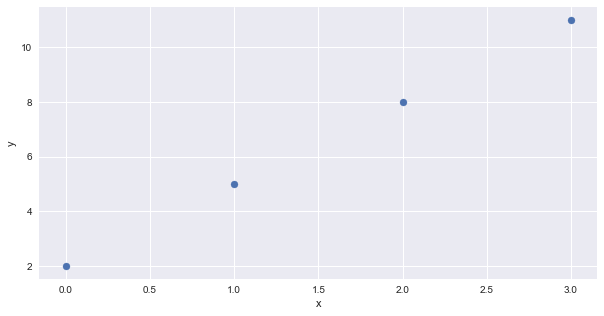

In [2]:
x = np.array([0,1,2,3])
y = 2.0 + 3.0*x
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Since we have two parameters that we are estimating, the constant and the coefficent for *x*, we will add a column of ones to the design matrix (X) so we can estimate both parameters.

In [3]:
# add intercept to x
X = np.column_stack((np.ones(x.shape[0]), x))

I'll now add a couple of functions that we can use to make plotting the graph and predicting the responses much easier.

Multipying X by the coeffiecients will allow us to calculate the predictions values

In [4]:
def predict(X, thetas):
    """
    Predict response bases on X values and coeffients
    """
    return X.dot(thetas)

Let's check to see if the predict method works using coefficents of 0 for the constant and 0 for the slope.  Using these coefficients we would expect the model to look as follow: $y=0+0x$ and therefore predicting zeros for all values of x.

In [5]:
coefs = [0,0]
predict(X, coefs)

array([ 0.,  0.,  0.,  0.])

That works.  Now let's setup a function so we can plot the data as we are checking our predictions.

In [6]:
def fitted_line_plot(X, y, thetas):
    plt.scatter(X[:,1], y, s=40)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Fitted Line Plot')
    pred_y = predict(X, thetas)
    plt.plot(X[:,1], pred_y, c='green', lw = 2)
    return plt

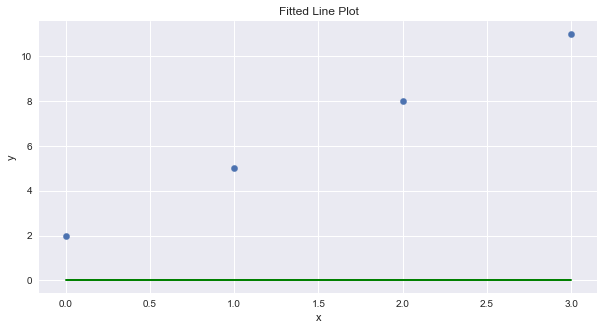

In [7]:
fitted_line_plot(X, y, coefs).show()

If you notice the green line at the bottom of the graph, you can see that for all values of x we are predicting a y value of 0.

Now that we have our base functions setup, let's turn this into an optimization problem.

# Finding the Optimal Coeffiecients

With any optimization problem we need to start with a very simple question: What are we optimizing?

In this case, the goal is for our predicted values to be as close to the actual results as possible. There are a number of optimization techniques that will accomplish this goal, but we will use the Mean Square Error (sometimes referred to in the abbreviated form as MSE).

Here is the calculation for MSE:

$$MSE = \frac{\sum_{i=1}^n(\hat{y} - y)^2}{n}$$

where:

$$\hat{y} = \text{predicted values}$$

$$n = \text{number of rows}$$
___

In short:

The objective of our optimization is to minimize MSE.

In [8]:
def mean_square_error(y, predictions):
    """
    Computes the mean square error which is the mean of the sum of squared errors
    """
    errors = predictions - y
    sse = np.sum(errors**2)
    mse = np.mean(sse)
    return mse

In [9]:
mean_square_error(y, predict(X, coefs))

214.0

We can now compute the gradient which multiplies X by the residuals where the residuals are equal to $\hat{y}-y$.

In [10]:
def compute_gradient(X, y, thetas):
    predictions = predict(X, thetas)
    errors = predictions - y
    gradient = np.dot(X.transpose(), errors)
    return gradient

In [11]:
compute_gradient(X,y, coefs)

array([-26., -54.])

These values tell us that we are underestimating our coefficients.  We can now continuously update the coefficients for a certain number of runs.  We also will use a learning rate that decreases the size of steps we take to improve optimization.  The learning rate should be less than 1 and greater than 0.  A larger learning rate can often lead to continuously jumping past the optimum, where a smaller learning rate will take longer to reach the optimum.

# Gradient Descent Implementation

In this section, I will declare the number of runs to optimize the coefficients as well as set a learning rate to obtain the coefficients

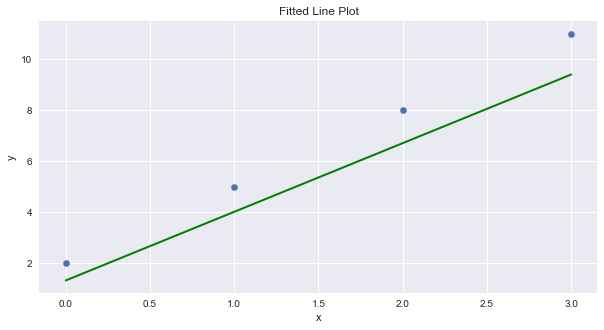

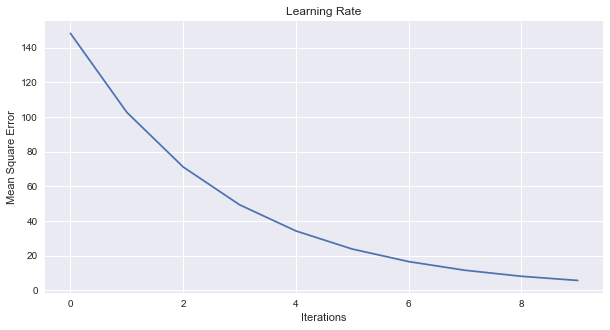

In [12]:
learning_rate = .01

costs = []
for _ in np.arange(10):
    coefs = coefs - learning_rate*compute_gradient(X, y, coefs)
    costs.append(mean_square_error(y, predict(X, coefs)))

fitted_line_plot(X, y, coefs).show()
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error')
plt.title('Learning Rate')
plt.show()

As we can see, by running gradient descent just 10 times, we are moving close to the optimal solution.  We will need to increase the number of runs, and we should be able to find the optimal solution.

I will start by writing a gradient descent function, that will initialize the coefficients to 0, and then continually update the coefficients for 1500 runs.

In [13]:
def gradient_descent(X, y, thetas = None, lr = .01, iters = 1500):
    m = X.shape[0]
    if thetas is None:
        thetas = np.zeros((X.ndim))
    xTrans = X.transpose()
    for i in np.arange(iters):
        hypothesis = np.dot(X, thetas)
        loss = hypothesis - y
        gradient = np.dot(xTrans, loss) / m
        thetas = thetas - lr * gradient
    return thetas

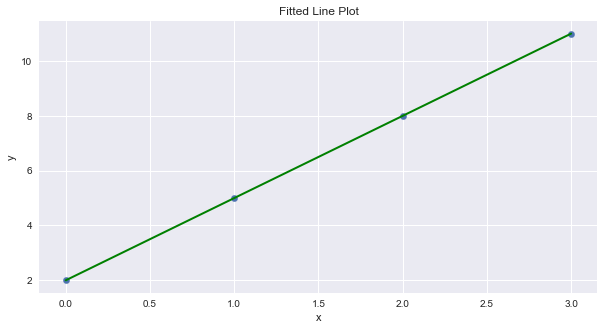

In [14]:
coefs = gradient_descent(X, y)
fitted_line_plot(X, y, coefs).show()

Not too shabby!